# 유튜브 댓글 크롤링

In [2]:
from selenium import webdriver
import time
from openpyxl import Workbook
import pandas as pd
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import matplotlib.font_manager as fm 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
from konlpy.tag import Okt

In [9]:
url='https://www.youtube.com/watch?v=ejZwkYRVpuw'

wb = Workbook(write_only=True)
ws = wb.create_sheet()

driver = webdriver.Chrome()
driver.get(url)
driver.implicitly_wait(10)

time.sleep(10)

driver.execute_script("window.scrollTo(0, 800)")
time.sleep(10)

In [10]:
# 페이지 끝까지 스크롤
last_height = driver.execute_script("return document.documentElement.scrollHeight")

while True:
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(15)

    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

time.sleep(15)

In [11]:
from selenium.webdriver.common.by import By
#팝업닫기
try:
    driver.find_element(By.CSS_SELECTOR, "#dismiss-button > a").click()
except:
    pass

In [12]:
# 대댓글 모두 열기
buttons = driver.find_elements(By.CSS_SELECTOR,"#more-replies > a")

time.sleep(15)

for button in buttons:
    button.send_keys(Keys.ENTER)
    time.sleep(15)
    button.click()

time.sleep(15)

In [14]:
# 정보 추출하기
html_source = driver.page_source
soup = BeautifulSoup(html_source, 'html.parser')


id_list = soup.select("a#author-text > yt-formatted-string")
comment_list = soup.select("yt-formatted-string#content-text")

id_final = []
comment_final = []

for i in range(len(comment_list)):
    temp_id = id_list[i].text
    temp_id = temp_id.replace('\n', '')
    temp_id = temp_id.replace('\t', '')
    temp_id = temp_id.replace('    ', '')
    id_final.append(temp_id)

    temp_comment = comment_list[i].text
    temp_comment = temp_comment.replace('\n', '')
    temp_comment = temp_comment.replace('\t', '')
    temp_comment = temp_comment.replace('    ', '')
    comment_final.append(temp_comment)

pd_data = {"아이디" : id_final , "댓글 내용" : comment_final}
pubao = pd.DataFrame(pd_data)

pubao.to_csv('result.csv')

In [18]:
dt=pd.read_csv('result.csv')
dt

,Unnamed: 0,아이디,댓글 내용
0,0,@user-rk7oy9is4h,강바오님 정년퇴직 하시더라도 그 후에 동물원 한바퀴 처럼 갖고계신 지식 이렇게 공유...
1,1,@user-il1mr6dn2p,"강바오님,,사육사계의 백종원,,오은영,,"
2,2,@spnamuamitabul,강철원사육사님이 다른 동물친구들 소개해주셔서 넘 좋아요~ 역시 푸바오 할부지♡♡
3,3,@StellaChoi952,우리 강바오님 정말 인품 ️🫶덕분에 뽀미와 레시에 관해서 하나 더 얻어가고 알아가요...
4,4,@user-oj8en4gp8h,강철원 사육사님 아이들 동화책이나 위인전 등의 책 읽어주는 직업도 잘 어울리실거같아요
...,...,...,...
84,84,@LEE-fl1tz,뽀미처럼 몸쓰면 디스크나 거북목이 안생기겠죠?
85,85,@hyeseounjang,어~~ 푸바오 할부지 왜 여기 계세요?
86,86,@Vidabello639,강바오할배가 저기 캡틴인가? 여기저기에서 다 보이시던데
87,87,@cloud_nine-ni2by,아버지의 부름에 대답하는 자식들이 없음 ㅋㅋ


# 워드클라우드

In [41]:
dt=pd.read_csv('result.csv')

fontpath='/Users/sje/NanumGothic.otf'
font=fm.FontProperties(fname=fontpath,size=9)

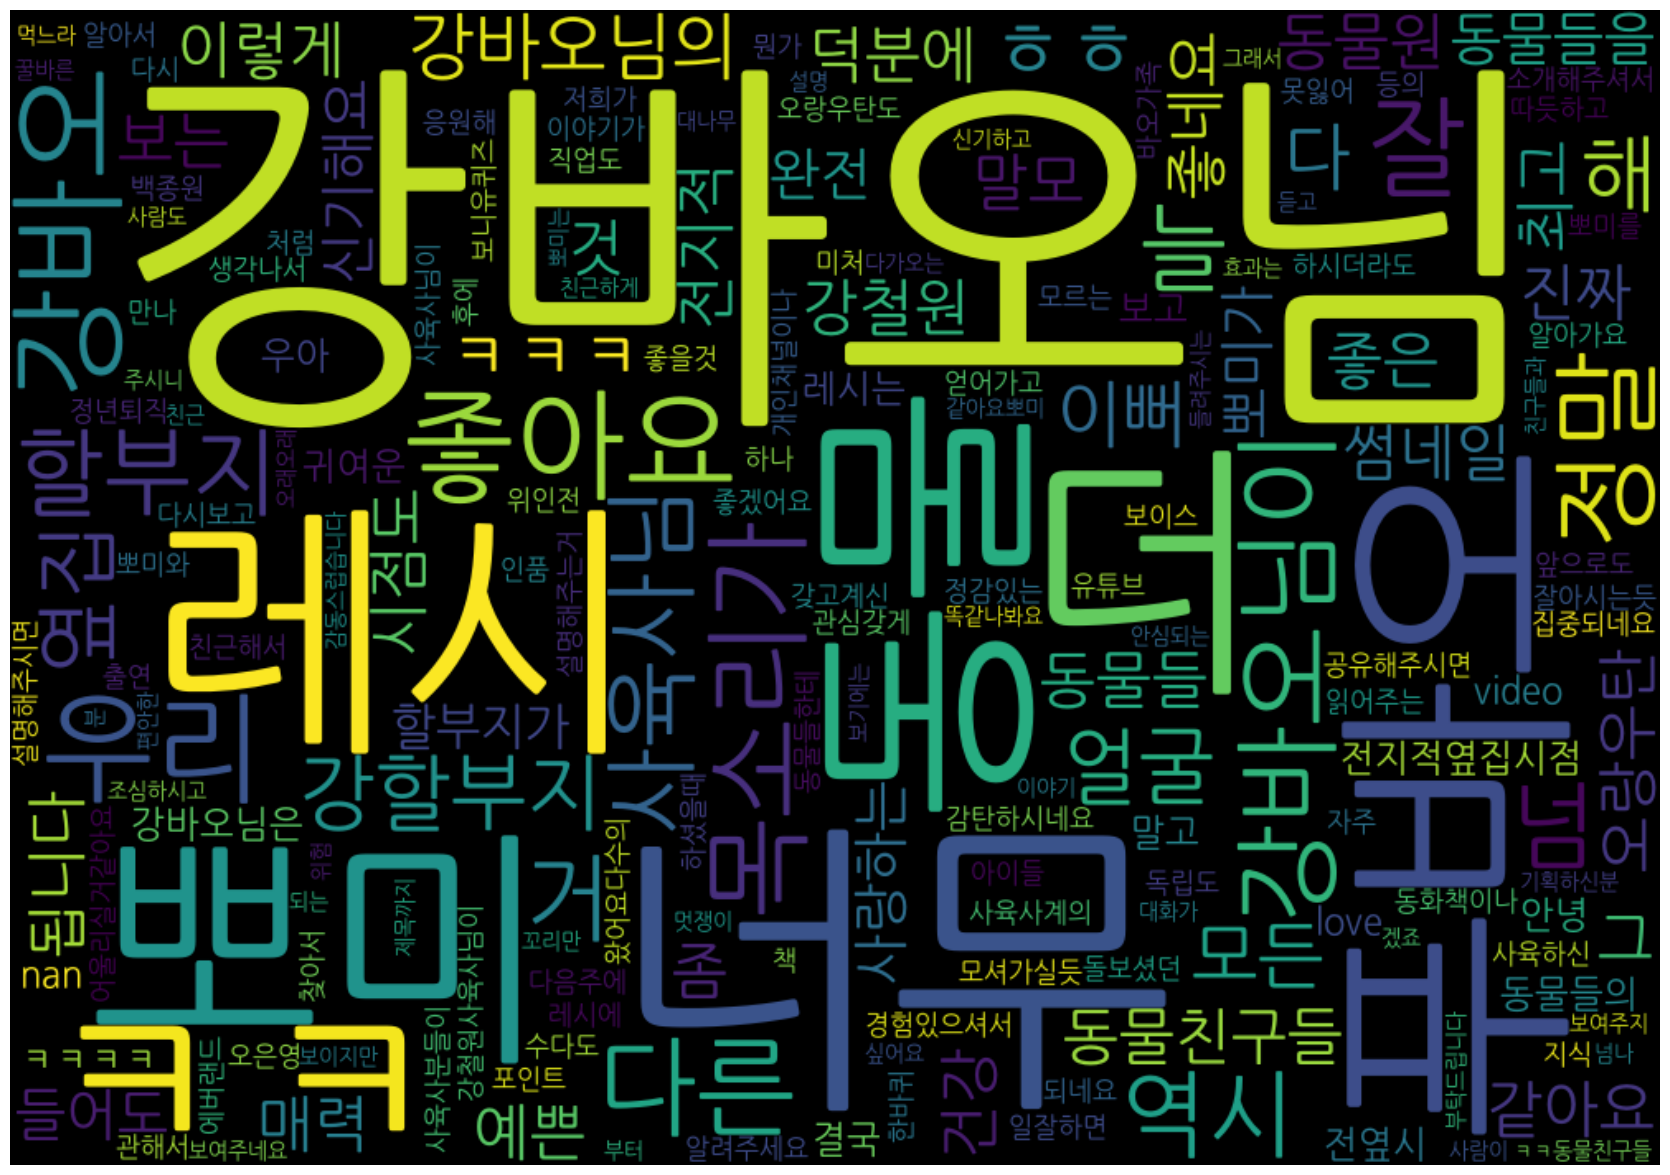

In [26]:
text =" ".join(li for li in dt['댓글 내용'].astype(str))

plt.subplots(figsize = (25, 15))
wordcloud = WordCloud(background_color = 'black', width = 1000, height = 700, font_path = fontpath).generate(text)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()